# <span style="color:blue"> <center> <strong> San Francisco Data Manipulation & Analysis Project </strong> </center> </span>
### <center> Dataset: San Francisco Neighborhood Prices Data </center> 
#### <center> Prepared by: Ahmed Yasser Disoky Dar </center>

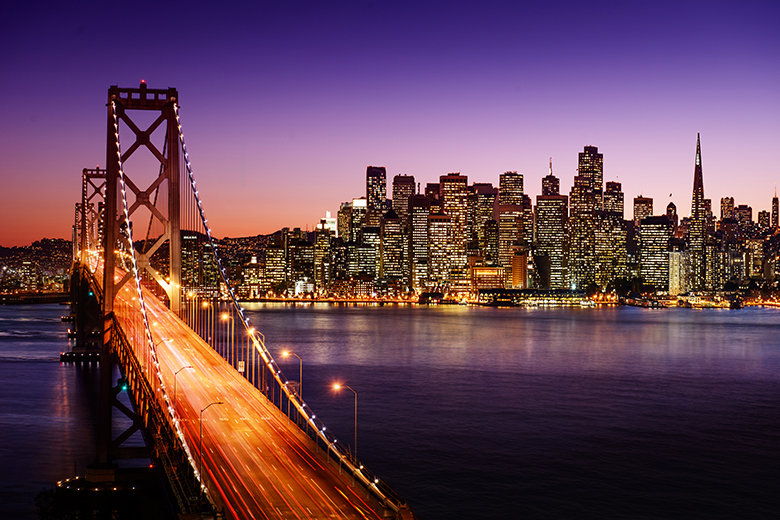

In [1]:
#Importing liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Readind the data csv file as pandas DataFrame
df = pd.read_csv('san_francisco.csv', index_col = 0)

### <span style="color:orange"> Info about the dataset </span>

In [3]:
#Getting a preview of how the data looks like
df.head()

,id,neighbourhood,latitude,longitude,room_type,price,days_occupied_in_2018,minimum_nights,number_of_reviews,reviews_per_month,availability_2019
0,958,Western Addition,37.769310,-122.433856,Entire home/apt,170,213.0,1,172,1.51,74
1,5858,Bernal Heights,37.745112,-122.421018,Entire home/apt,235,0.0,30,112,0.96,365
2,7918,Haight Ashbury,37.766690,-122.452505,Private room,65,0.0,32,17,0.15,365
3,8142,Haight Ashbury,37.764872,-122.451828,Private room,65,0.0,32,8,0.15,365
4,8339,Western Addition,37.775249,-122.436374,Entire home/apt,785,276.0,7,27,0.24,89


In [4]:
#Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7072 entries, 0 to 7071
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     7072 non-null   int64  
 1   neighbourhood          7072 non-null   object 
 2   latitude               7072 non-null   float64
 3   longitude              7072 non-null   float64
 4   room_type              7072 non-null   object 
 5   price                  7072 non-null   int64  
 6   days_occupied_in_2018  2999 non-null   float64
 7   minimum_nights         7072 non-null   int64  
 8   number_of_reviews      7072 non-null   int64  
 9   reviews_per_month      5744 non-null   float64
 10  availability_2019      7072 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 663.0+ KB


In [5]:
df.columns

Index(['id', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'days_occupied_in_2018', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'availability_2019'],
      dtype='object')

In [6]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7062, 7063, 7064, 7065, 7066, 7067, 7068, 7069, 7070, 7071],
           dtype='int64', length=7072)

In [7]:
df.values

array([[958, 'Western Addition', 37.76931037734077, ..., 172, 1.51, 74],
       [5858, 'Bernal Heights', 37.745112331410034, ..., 112, 0.96, 365],
       [7918, 'Haight Ashbury', 37.766689597862175, ..., 17, 0.15, 365],
       ...,
       [30541662, 'South of Market', 37.775283821104146, ..., 0, nan, 85],
       [30542954, 'Downtown/Civic Center', 37.7883249413783, ..., 0, nan,
        351],
       [30552278, 'Mission', 37.765561288814666, ..., 0, nan, 138]],
      dtype=object)

### <span style="color:orange"> Statistical summary about the dataset </span>

In [8]:
#Converting the id column to string type 
df['id'] = df['id'].astype(str)

<span style="color:blue"> We convert the (id) column to string type as it has to be a unique key for each record </span>

In [14]:
df.loc[:, 'price':'availability_2019'].describe()

,price,days_occupied_in_2018,minimum_nights,number_of_reviews,reviews_per_month,availability_2019
count,7072.000000,2999.000000,7.072000e+03,7072.000000,5744.000000,7072.000000
mean,212.993920,181.571190,1.415635e+04,43.247031,1.932739,164.262585
std,333.335336,128.782279,1.189129e+06,71.176549,2.038795,133.190595
min,0.000000,0.000000,1.000000e+00,0.000000,0.010000,0.000000
25%,100.000000,38.000000,2.000000e+00,1.000000,0.357500,40.000000
50%,150.000000,208.000000,4.000000e+00,12.000000,1.140000,137.000000
75%,232.250000,298.000000,3.000000e+01,54.000000,2.920000,308.000000
max,9999.000000,364.000000,1.000000e+08,649.000000,12.000000,365.000000


### <span style="color:orange"> Making the "id" column the data index </span>

In [15]:
df = df.set_index('neighbourhood')

In [16]:
df.head()

,id,latitude,longitude,room_type,price,days_occupied_in_2018,minimum_nights,number_of_reviews,reviews_per_month,availability_2019
neighbourhood,,,,,,,,,,
Western Addition,958,37.769310,-122.433856,Entire home/apt,170,213.0,1,172,1.51,74
Bernal Heights,5858,37.745112,-122.421018,Entire home/apt,235,0.0,30,112,0.96,365
Haight Ashbury,7918,37.766690,-122.452505,Private room,65,0.0,32,17,0.15,365
Haight Ashbury,8142,37.764872,-122.451828,Private room,65,0.0,32,8,0.15,365
Western Addition,8339,37.775249,-122.436374,Entire home/apt,785,276.0,7,27,0.24,89


In [17]:
df.sort_values('neighbourhood')

,id,latitude,longitude,room_type,price,days_occupied_in_2018,minimum_nights,number_of_reviews,reviews_per_month,availability_2019
neighbourhood,,,,,,,,,,
Bayview,29194517,37.722774,-122.392933,Private room,47,NaN,1,2,2.00,33
Bayview,28488955,37.730984,-122.393930,Entire home/apt,99,NaN,30,1,0.58,164
Bayview,900569,37.738253,-122.397927,Private room,79,NaN,30,14,0.20,66
Bayview,2263794,37.735830,-122.387374,Private room,103,287.0,2,107,5.15,56
Bayview,7788844,37.731321,-122.391381,Entire home/apt,115,152.0,2,184,4.71,152
...,...,...,...,...,...,...,...,...,...,...
Western Addition,2077982,37.778186,-122.439691,Entire home/apt,140,206.0,30,118,1.95,339
Western Addition,2048834,37.778030,-122.440168,Entire home/apt,95,70.0,30,154,2.55,334
Western Addition,23681672,37.784095,-122.446040,Private room,299,NaN,30,3,0.34,280


### <span style="color:orange"> Checking for missing values </span>

In [18]:
df.isna().any()

id                       False
latitude                 False
longitude                False
room_type                False
price                    False
days_occupied_in_2018     True
minimum_nights           False
number_of_reviews        False
reviews_per_month         True
availability_2019        False
dtype: bool

<span style="color:blue"> It seems we have 2 columns that have missing values (days_occupied_in_2018 & reviews_per_month) </span> 

In [19]:
df.loc[:, ['days_occupied_in_2018', 'reviews_per_month']]

,days_occupied_in_2018,reviews_per_month
neighbourhood,,
Western Addition,213.0,1.51
Bernal Heights,0.0,0.96
Haight Ashbury,0.0,0.15
Haight Ashbury,0.0,0.15
Western Addition,276.0,0.24
...,...,...
Twin Peaks,NaN,NaN
Lakeshore,NaN,NaN
South of Market,NaN,NaN


<span style="color:blue"> After evaluating our data, the best pratice is to replace these values with zeros </span>

### <span style="color:orange"> Cleaning NaN values for both columns </span>

In [20]:
df = df.fillna(0)

In [21]:
df.isna().sum()

id                       0
latitude                 0
longitude                0
room_type                0
price                    0
days_occupied_in_2018    0
minimum_nights           0
number_of_reviews        0
reviews_per_month        0
availability_2019        0
dtype: int64

<span style="color:blue"> Now, we have no NaN values </span>

### <span style="color:orange"> Checking for duplicates </span>

In [22]:
df[df.duplicated() == True]

,id,latitude,longitude,room_type,price,days_occupied_in_2018,minimum_nights,number_of_reviews,reviews_per_month,availability_2019
neighbourhood,,,,,,,,,,


### <span style="color:orange"> Data manipualtion & analysis to answer business questions </span>

## Q1: What the number of private rooms that have a price more than $150?

In [23]:
private_more_than_150 = df[(df['room_type'] == 'Private room') & (df['price'] > 150)]

In [24]:
private_more_than_150.head()

,id,latitude,longitude,room_type,price,days_occupied_in_2018,minimum_nights,number_of_reviews,reviews_per_month,availability_2019
neighbourhood,,,,,,,,,,
Potrero Hill,24463,37.756446,-122.399102,Private room,155,194.0,2,266,2.56,159
Mission,27028,37.760976,-122.421581,Private room,199,0.0,1,25,0.57,0
South of Market,51073,37.771163,-122.421995,Private room,180,0.0,2,149,1.50,15
Outer Richmond,220780,37.775793,-122.507019,Private room,162,0.0,30,0,0.00,82
Castro/Upper Market,271505,37.766388,-122.429257,Private room,160,316.0,3,182,2.16,59


## Q2: What is the average number of reviews for each room type?

In [25]:
df.groupby('room_type').agg({'number_of_reviews':'mean'})

,number_of_reviews
room_type,
Entire home/apt,35.048099
Private room,57.206418
Shared room,46.340659


## Q3: Which room type with a price more than $2500, had the highest minimum nights on average?

In [26]:
df['more_than_2500'] = df['price'] > 2500

In [27]:
df.groupby(['room_type', 'more_than_2500']).agg({'minimum_nights':'mean'})

minimum_nights
room_type       more_than_2500                
Entire home/apt False                18.592695
                True                 51.769231
Private room    False             39661.413957
                True                563.000000
Shared room     False                27.016484

### <span style="color:orange"> Using pivot tables to extract summary statistics for the number of reviews per room type </span>

In [28]:
df.pivot_table(values='number_of_reviews', index='room_type', aggfunc=[np.mean, np.median, max, min, np.std])

,mean,median,max,min,std
,number_of_reviews,number_of_reviews,number_of_reviews,number_of_reviews,number_of_reviews
room_type,,,,,
Entire home/apt,35.048099,8.0,649,0,62.674679
Private room,57.206418,22.0,631,0,81.658875
Shared room,46.340659,4.5,342,0,76.718142


In [29]:
stat_ngh_price = df.pivot_table(values='price', index='neighbourhood',  aggfunc=[np.mean, np.median, max, min, np.std], fill_value=0 )

In [30]:
stat_ngh_price

,mean,median,max,min,std
,price,price,price,price,price
Bayview,141.213740,100.0,2200,36,210.003590
Bernal Heights,176.551451,140.0,1000,0,120.788456
Castro/Upper Market,230.869347,175.0,1450,10,175.366397
Chinatown,176.085470,140.0,800,30,123.749300
Crocker Amazon,111.477273,89.5,450,37,84.698505
Diamond Heights,702.222222,179.0,9270,80,2141.165393
Downtown/Civic Center,170.835789,138.0,1200,32,145.935461
Excelsior,121.014493,100.0,550,28,88.259321
Financial District,237.424242,185.0,2010,38,256.067504


<span style="color:blue"> We store the statistical information about prices for each neighbourhood in a new csv file </span>

In [61]:
stat_ngh_price.to_csv('stat_ngh_price.csv')

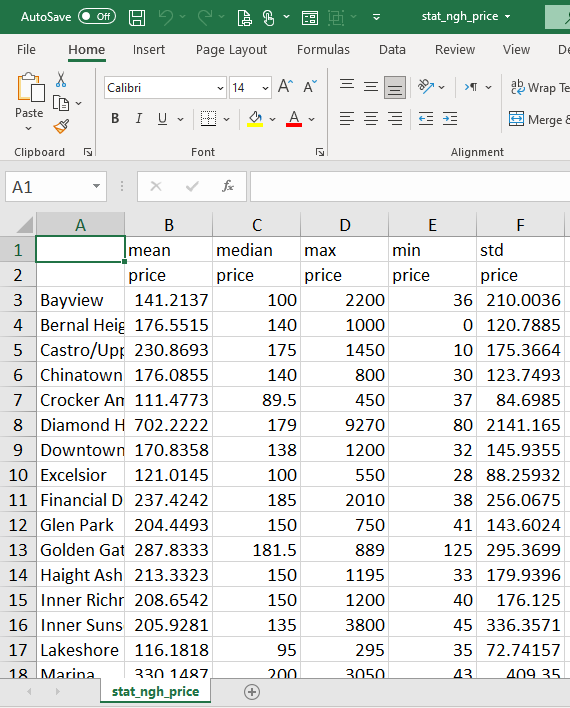

## <span style="color:orange"> Visualization of the data </span>

## V1: The distribution of the number of reviews per month

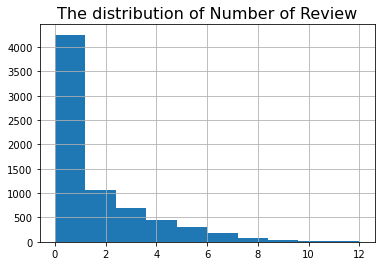

In [31]:
df['reviews_per_month'].hist()
plt.title('The distribution of Number of Review', fontsize=16)
plt.show()

## V2: The average days occupied in 2018 per room type

In [32]:
avg_nbh_day_2018 = df.groupby('room_type')['days_occupied_in_2018'].mean()

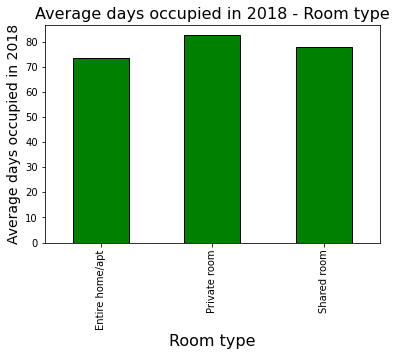

In [33]:
avg_nbh_day_2018.plot(kind='bar', color='green', edgecolor='black')
plt.xlabel('Room type', fontsize=16)
plt.ylabel('Average days occupied in 2018', fontsize = 14)
plt.title('Average days occupied in 2018 - Room type', fontsize=16)
plt.show()

## V3: The Relationship between room prices & number of reviews

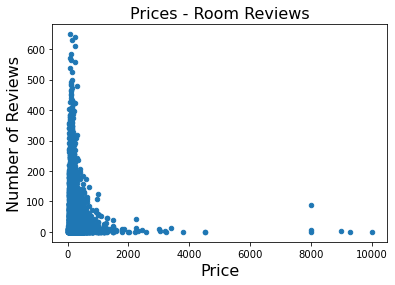

In [34]:
df.plot(x='price', y='number_of_reviews', kind='scatter')
plt.xlabel('Price', fontsize=16)
plt.ylabel('Number of Reviews', fontsize=16)
plt.title('Prices - Room Reviews', fontsize = 16)
plt.show()

## V4: A comparison between prices of private rooms and prices of entire home/apt

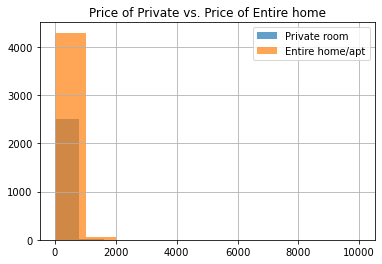

In [35]:
df[df['room_type'] == 'Private room']['price'].hist(alpha = 0.7)
df[df['room_type'] == 'Entire home/apt']['price'].hist(alpha = 0.7)
plt.legend(['Private room', 'Entire home/apt'])
plt.title('Price of Private vs. Price of Entire home')
plt.show()